In [26]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy.stats import pearsonr, spearmanr # 선형적인 상관관계 , 상관관계 여부 파악

from datetime import datetime, timedelta
import warnings
warnings.filterwarnings(action='ignore')

# 한글폰트 설정
plt.rc("font",family="Malgun Gothic")
plt.rc("axes",unicode_minus="False")

# Load Big Five Personality Test Dataset

* [data link from Kaggle](https://www.kaggle.com/tunguz/big-five-personality-test)

In [4]:
pos_questions = [
    'OPN1','OPN3','OPN5','OPN7','OPN8','OPN9','OPN10',        # 7 Openness 개방성
    'CSN1','CSN3','CSN5','CSN7','CSN9','CSN10',               # 6 Conscientiousness 성실성
    'EXT1','EXT3','EXT5','EXT7','EXT9',                       # 5 Extroversion 외향성
    'AGR2','AGR4','AGR6','AGR8','AGR9','AGR10',               # 6 Agreeableness 친화성
    'EST1','EST3','EST5','EST6','EST7','EST8','EST9','EST10', # 8 Emotional Stability 안정성(신경성)
]

neg_questions = [
    'OPN2','OPN4','OPN6',                # 3 Openness
    'CSN2','CSN4','CSN6','CSN8',         # 4 Conscientiousness
    'EXT2','EXT4','EXT6','EXT8','EXT10', # 5 Extroversion
    'AGR1','AGR3','AGR5','AGR7',         # 4 Agreeableness
    'EST2','EST4',                       # 2 Emotional Stability
]

# 사용하는 칼럼만 가져옴
usecols = pos_questions + neg_questions + ['country']

df = pd.read_csv('C:\\Users\\user\\Desktop\\dataset\\data-final.csv', sep='\t', usecols=usecols)

In [5]:
# 데이터 확인
pd.set_option('display.max_columns', 500)

df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE


In [7]:
len(df)

1015341

# Data preprocessing

### 0점 점수표현은 제거

1=Disagree, 3=Neutral, 5=Agree

In [8]:
df = df.replace(0, np.nan).dropna(axis=0).reset_index(drop=True)

df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE


In [9]:
len(df)

874366

### 100 명 이상 답변한 나라만 선정

In [10]:
df_country = (df.groupby('country').agg('count')['EXT1'] > 100).reset_index()

cond_true = df_country[df_country['EXT1'] == True]['country']
df = df[df['country'].isin(cond_true)].reset_index(drop=True)

df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,4.0,1.0,5.0,2.0,5.0,1.0,5.0,2.0,4.0,1.0,1.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,5.0,2.0,4.0,2.0,3.0,2.0,4.0,3.0,4.0,3.0,4.0,3.0,2.0,2.0,4.0,4.0,2.0,4.0,4.0,5.0,1.0,4.0,1.0,4.0,1.0,5.0,3.0,4.0,5.0,GB
1,3.0,5.0,3.0,4.0,3.0,3.0,2.0,5.0,1.0,5.0,2.0,3.0,4.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,1.0,4.0,1.0,5.0,1.0,5.0,3.0,4.0,5.0,3.0,3.0,2.0,5.0,3.0,3.0,1.0,3.0,3.0,5.0,3.0,1.0,2.0,4.0,2.0,3.0,1.0,4.0,2.0,5.0,3.0,MY
2,2.0,3.0,4.0,4.0,3.0,2.0,1.0,3.0,2.0,5.0,4.0,4.0,4.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,1.0,4.0,1.0,4.0,2.0,4.0,1.0,4.0,4.0,3.0,4.0,2.0,2.0,2.0,3.0,3.0,4.0,2.0,4.0,2.0,5.0,1.0,2.0,1.0,4.0,2.0,5.0,3.0,4.0,4.0,GB
3,2.0,2.0,2.0,3.0,4.0,2.0,2.0,4.0,1.0,4.0,3.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0,3.0,2.0,4.0,3.0,4.0,2.0,4.0,2.0,4.0,3.0,4.0,2.0,4.0,4.0,4.0,1.0,2.0,2.0,3.0,1.0,4.0,4.0,2.0,5.0,2.0,3.0,1.0,4.0,4.0,3.0,3.0,GB
4,3.0,3.0,3.0,3.0,5.0,3.0,3.0,5.0,3.0,4.0,1.0,5.0,5.0,3.0,1.0,1.0,1.0,1.0,3.0,2.0,1.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,5.0,3.0,5.0,1.0,5.0,1.0,3.0,1.0,5.0,1.0,5.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,5.0,3.0,5.0,5.0,KE


In [11]:
len(df)

872094

### Pos Neg 점수 기준 변환

-2, -1, 0, 1, 2

In [12]:
df[pos_questions] = df[pos_questions].replace({1:-2, 2:-1, 3:0, 4:1, 5:2})
df[neg_questions] = df[neg_questions].replace({1:2, 2:1, 3:0, 4:-1, 5:-2})

df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country
0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,-2.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,-1.0,0.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,0.0,1.0,2.0,GB
1,0.0,-2.0,0.0,-1.0,0.0,0.0,-1.0,-2.0,-2.0,-2.0,-1.0,0.0,1.0,2.0,0.0,-2.0,-1.0,-2.0,0.0,-2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.0,1.0,2.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,-2.0,1.0,1.0,1.0,0.0,2.0,1.0,-1.0,2.0,0.0,MY
2,-1.0,0.0,1.0,-1.0,0.0,1.0,-2.0,0.0,-1.0,-2.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-2.0,0.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,1.0,-1.0,1.0,0.0,0.0,1.0,1.0,1.0,-1.0,2.0,2.0,-1.0,2.0,1.0,1.0,2.0,0.0,1.0,1.0,GB
3,-1.0,1.0,-1.0,0.0,1.0,1.0,-1.0,-1.0,-2.0,-1.0,0.0,0.0,0.0,1.0,0.0,-1.0,-1.0,-1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,-1.0,-1.0,1.0,-1.0,-2.0,1.0,-1.0,0.0,-2.0,1.0,1.0,1.0,2.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,GB
4,0.0,0.0,0.0,0.0,2.0,0.0,0.0,-2.0,0.0,-1.0,-2.0,-2.0,2.0,0.0,-2.0,-2.0,-2.0,-2.0,0.0,-1.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,KE


### 유형 별 질문 점수 통합

In [13]:
traits = {
    'OPN': '개방성',
    'CSN': '성실성',
    'EXT': '외향성',
    'AGR': '친화성',
    'EST': '안정성'
}

for trait, trait_kor in traits.items():
  trait_cols = sorted([col for col in df.columns if trait in col])
  df[trait_kor] = df[trait_cols].sum(axis=1)

df.head()

,EXT1,EXT2,EXT3,EXT4,EXT5,EXT6,EXT7,EXT8,EXT9,EXT10,EST1,EST2,EST3,EST4,EST5,EST6,EST7,EST8,EST9,EST10,AGR1,AGR2,AGR3,AGR4,AGR5,AGR6,AGR7,AGR8,AGR9,AGR10,CSN1,CSN2,CSN3,CSN4,CSN5,CSN6,CSN7,CSN8,CSN9,CSN10,OPN1,OPN2,OPN3,OPN4,OPN5,OPN6,OPN7,OPN8,OPN9,OPN10,country,개방성,성실성,외향성,친화성,안정성
0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,2.0,-2.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,0.0,-1.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,-1.0,0.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,0.0,1.0,2.0,GB,15.0,2.0,16.0,9.0,-6.0
1,0.0,-2.0,0.0,-1.0,0.0,0.0,-1.0,-2.0,-2.0,-2.0,-1.0,0.0,1.0,2.0,0.0,-2.0,-1.0,-2.0,0.0,-2.0,2.0,1.0,2.0,2.0,2.0,2.0,0.0,1.0,2.0,0.0,0.0,1.0,2.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,-2.0,1.0,1.0,1.0,0.0,2.0,1.0,-1.0,2.0,0.0,MY,5.0,7.0,-10.0,14.0,-5.0
2,-1.0,0.0,1.0,-1.0,0.0,1.0,-2.0,0.0,-1.0,-2.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-2.0,0.0,2.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,1.0,-1.0,1.0,0.0,0.0,1.0,1.0,1.0,-1.0,2.0,2.0,-1.0,2.0,1.0,1.0,2.0,0.0,1.0,1.0,GB,11.0,4.0,-5.0,12.0,-4.0
3,-1.0,1.0,-1.0,0.0,1.0,1.0,-1.0,-1.0,-2.0,-1.0,0.0,0.0,0.0,1.0,0.0,-1.0,-1.0,-1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,-1.0,-1.0,1.0,-1.0,-2.0,1.0,-1.0,0.0,-2.0,1.0,1.0,1.0,2.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,GB,9.0,-5.0,-4.0,8.0,-1.0
4,0.0,0.0,0.0,0.0,2.0,0.0,0.0,-2.0,0.0,-1.0,-2.0,-2.0,2.0,0.0,-2.0,-2.0,-2.0,-2.0,0.0,-1.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,KE,18.0,18.0,-1.0,16.0,-11.0


In [14]:
df_traits = df[list(traits.values()) + ['country']].copy()
df_traits.head()

,개방성,성실성,외향성,친화성,안정성,country
0,15.0,2.0,16.0,9.0,-6.0,GB
1,5.0,7.0,-10.0,14.0,-5.0,MY
2,11.0,4.0,-5.0,12.0,-4.0,GB
3,9.0,-5.0,-4.0,8.0,-1.0,GB
4,18.0,18.0,-1.0,16.0,-11.0,KE


# 분포도

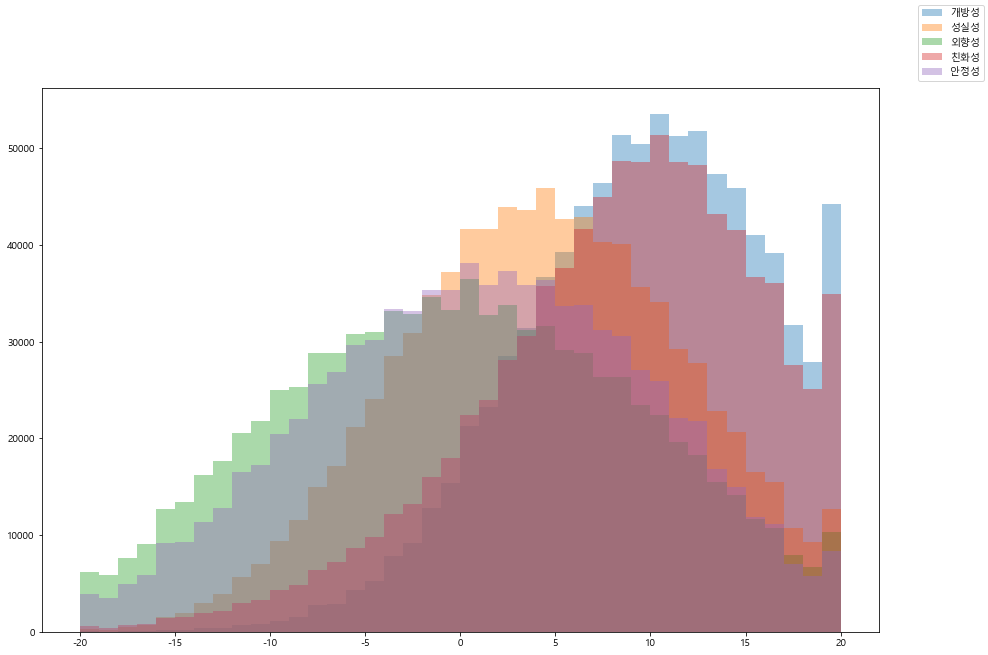

In [23]:
fig = plt.figure(figsize=(15, 10))

for trait in traits.values():
  sns.distplot(df_traits[trait], kde=False, bins=40, axlabel=False)

fig.legend(traits.values())

# 한국과 일본의 개방성 평가지표 비교

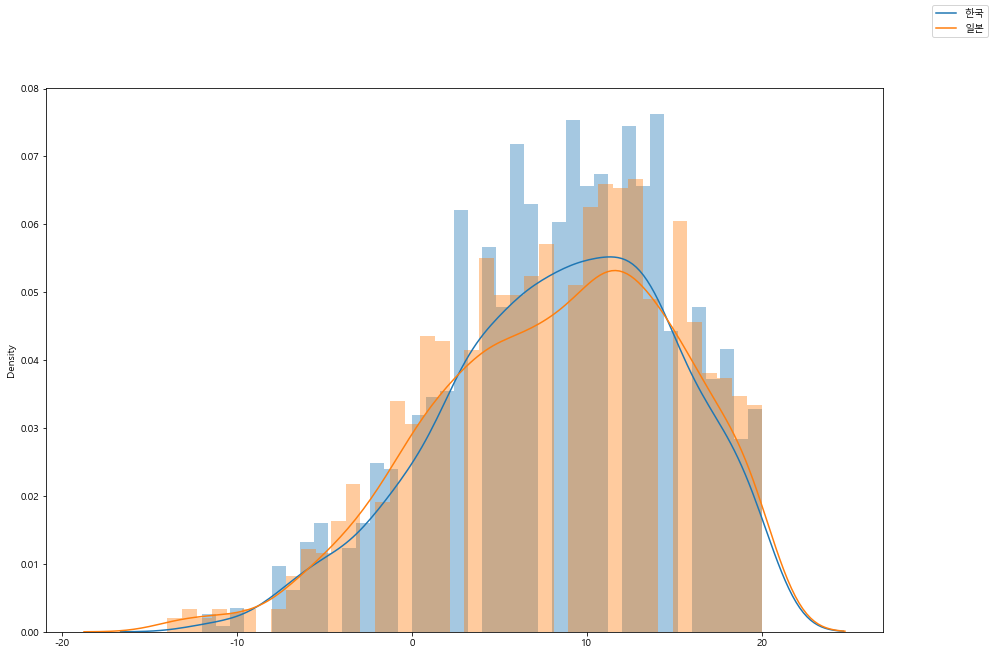

In [27]:
fig = plt.figure(figsize=(15, 10))

sns.distplot(df_traits[df_traits['country'] =='KR']['개방성'], bins=40, axlabel=False)
sns.distplot(df_traits[df_traits['country'] =='JP']['개방성'], bins=40, axlabel=False)

fig.legend(['한국','일본'])

# 한국과 미국의 개방정 지표 비교

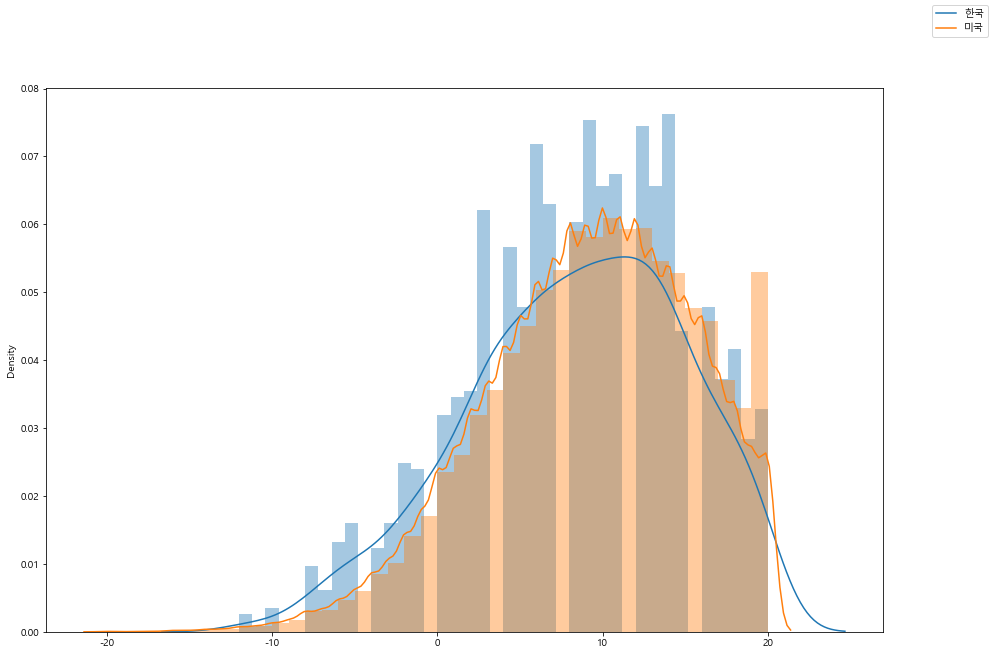

In [29]:
fig = plt.figure(figsize=(15, 10))

sns.distplot(df_traits[df_traits['country'] =='KR']['개방성'], bins=40, axlabel=False)
sns.distplot(df_traits[df_traits['country'] =='US']['개방성'], bins=40, axlabel=False)

fig.legend(['한국','미국'])

# 나라 별 지표 평균

In [31]:
df_traits_mean = df_traits.groupby('country').mean().rename_axis('country').reset_index()

df_traits_mean.head()

,country,개방성,성실성,외향성,친화성,안정성
0,AE,7.639791,4.032090,0.261933,7.917770,1.475732
1,AL,10.188889,3.391667,-1.361111,6.205556,1.361111
2,AR,10.133075,1.678530,-1.654932,6.416248,2.381431
3,AT,10.836251,2.518538,-0.100412,6.876931,-0.143666
4,AU,8.551472,3.626061,-0.062085,7.918328,0.393272


In [33]:
df_traits_mean[df_traits_mean['country']=='KR']

,country,개방성,성실성,외향성,친화성,안정성
58,KR,8.384397,2.177305,-0.892199,5.635461,0.848227


# 코로나 데이터세트 load

* [data_link](https://github.com/datasets/covid-19)

In [34]:
df_covid = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/time-series-19-covid-combined.csv', parse_dates=['Date'])

df_covid.head()

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,0,0.0,0
1,2020-01-23,Afghanistan,NaN,0,0.0,0
2,2020-01-24,Afghanistan,NaN,0,0.0,0
3,2020-01-25,Afghanistan,NaN,0,0.0,0
4,2020-01-26,Afghanistan,NaN,0,0.0,0


# Country Code 데이터 load
* [data_link](https://datahub.io/core/country-list#pandas)

In [35]:
pip install datapackage

  Created wheel for linear-tsv: filename=linear_tsv-1.1.0-py3-none-any.whl size=7382 sha256=432e0fa307d9c62a356bcc06e596cd158c781e2bb2abb2a57e613586b8c3bfa8
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\31\25\a5\d9b4b59636e1b9f183b7e1022e7be5c51141717b92398d7f9e
Successfully built linear-tsv
Note: you may need to restart the kernel to use updated packages.


In [36]:
from datapackage import Package

package = Package('https://datahub.io/core/country-list/datapackage.json')

['validation_report', 'data_csv', 'data_json', 'country-list_zip', 'data']


In [42]:
resources = package.resources
for resource in resources:
    if resource.tabular:
        country_code = pd.read_csv(resource.descriptor['path'])

In [43]:
country_code.head()

,Name,Code
0,Afghanistan,AF
1,Åland Islands,AX
2,Albania,AL
3,Algeria,DZ
4,American Samoa,AS


# Filter Dataset

In [63]:
# 확진자 수 50명 이상
df_covid = df_covid[df_covid['Confirmed']>50].reset_index(drop=True)

# 나라 기준으로 gropuby , 날짜별
df_covid = df_covid.groupby(['Country/Region', 'Date']).sum().reset_index()

In [64]:
# 미국 
df_covid[df_covid['Country/Region'] == 'US']

,Country/Region,Date,Confirmed,Recovered,Deaths
87103,US,2020-03-02,55,7.0,6
87104,US,2020-03-03,74,7.0,7
87105,US,2020-03-04,107,7.0,11
87106,US,2020-03-05,184,7.0,12
87107,US,2020-03-06,237,7.0,14
...,...,...,...,...,...
87646,US,2021-08-27,38707294,0.0,636720
87647,US,2021-08-28,38760363,0.0,637254
87648,US,2021-08-29,38798836,0.0,637539
87649,US,2021-08-30,39057368,0.0,638711


In [65]:
# 확진자 50명이 된 날 이후로 부터 30일 이후의 데이터가 있는 나라만 필터링
n_days = 30

# 현재 날짜 - 50명이 된 날짜 > 30일
filtered = (
    datetime.now() - df_covid.groupby('Country/Region')['Date'].min() > timedelta(days=n_days)
).reset_index().rename(columns={'Date': 'Filtered'})

filtered_countries = filtered[filtered['Filtered'] == True]['Country/Region']

df_covid = df_covid[df_covid['Country/Region'].isin(filtered_countries)]

# 첫 30일간 데이터의 마지막 데이터 = 즉, 30일 이후의 데이터
df_covid_30days = df_covid.groupby('Country/Region').head(n_days).groupby('Country/Region').tail(1)

df_covid_30days

,Country/Region,Date,Confirmed,Recovered,Deaths
29,Afghanistan,2020-04-23,1236,179.0,40
554,Albania,2020-04-14,475,248.0,24
1088,Algeria,2020-04-14,2070,691.0,326
1622,Andorra,2020-04-17,696,191.0,35
2153,Angola,2020-06-17,155,64.0,7
...,...,...,...,...,...
91399,Vietnam,2020-04-12,262,144.0,0
91935,West Bank and Gaza,2020-04-20,329,71.0,2
92463,Yemen,2020-06-08,496,23.0,112
92942,Zambia,2020-05-16,679,183.0,7


In [66]:
df_covid_30days = df_covid_30days.merge(country_code, left_on='Country/Region', right_on='Name')

df_covid_30days.head()

,Country/Region,Date,Confirmed,Recovered,Deaths,Name,Code
0,Afghanistan,2020-04-23,1236,179.0,40,Afghanistan,AF
1,Albania,2020-04-14,475,248.0,24,Albania,AL
2,Algeria,2020-04-14,2070,691.0,326,Algeria,DZ
3,Andorra,2020-04-17,696,191.0,35,Andorra,AD
4,Angola,2020-06-17,155,64.0,7,Angola,AO


In [67]:
df_covid_30days = df_covid_30days.merge(df_traits_mean, left_on='Code', right_on='country')
df_covid_30days.head()

,Country/Region,Date,Confirmed,Recovered,Deaths,Name,Code,country,개방성,성실성,외향성,친화성,안정성
0,Albania,2020-04-14,475,248.0,24,Albania,AL,AL,10.188889,3.391667,-1.361111,6.205556,1.361111
1,Algeria,2020-04-14,2070,691.0,326,Algeria,DZ,DZ,10.234694,1.765306,-3.959184,5.229592,3.765306
2,Argentina,2020-04-14,2277,559.0,102,Argentina,AR,AR,10.133075,1.678530,-1.654932,6.416248,2.381431
3,Australia,2020-04-08,5982,1078.0,50,Australia,AU,AU,8.551472,3.626061,-0.062085,7.918328,0.393272
4,Austria,2020-04-04,11781,2507.0,186,Austria,AT,AT,10.836251,2.518538,-0.100412,6.876931,-0.143666


In [70]:
df_covid_30days.sort_values('Confirmed', ascending=False).head(10)

,Country/Region,Date,Confirmed,Recovered,Deaths,Name,Code,country,개방성,성실성,외향성,친화성,안정성
83,Spain,2020-03-30,87956,16780.0,7716,Spain,ES,ES,10.030204,2.424257,0.021840,7.400558,0.417983
18,China,2020-02-20,75048,17991.0,2238,China,CN,CN,6.453737,3.510676,0.095196,7.660142,-0.177046
90,Turkey,2020-04-16,74193,7089.0,1643,Turkey,TR,TR,9.706407,3.132603,-0.768451,6.029197,2.375912
33,Germany,2020-03-29,62095,9211.0,533,Germany,DE,DE,11.064345,2.262837,-1.361762,6.261473,0.133023
44,Italy,2020-03-22,59138,7024.0,5476,Italy,IT,IT,10.193612,2.803107,-1.071757,6.770291,2.185955
31,France,2020-03-28,37603,5718.0,2314,France,FR,FR,10.871051,2.003880,-1.184740,6.968964,1.292444
94,United Kingdom,2020-03-28,26992,149.0,1465,United Kingdom,GB,GB,9.244396,2.541266,-0.286631,7.144137,1.672674
16,Canada,2020-04-11,24033,0.0,985,Canada,CA,CA,9.237147,3.752232,-0.442912,7.870115,0.659691
13,Brazil,2020-04-10,19638,173.0,1057,Brazil,BR,BR,10.536946,1.240467,-3.494983,4.946725,1.545703
10,Belgium,2020-04-04,18431,3247.0,1283,Belgium,BE,BE,9.308450,2.029262,-0.032547,7.661989,0.598089


상위 5개국은 확진자 수가 비정상적으로 많으므로 경향성에 부정적인 영향을 미치므로 제거

In [72]:
new_df = df_covid_30days[~df_covid_30days['country'].isin(['ES','CN','TR','DE','IT'])]

# 피어슨 상관계수로 선형성 확인

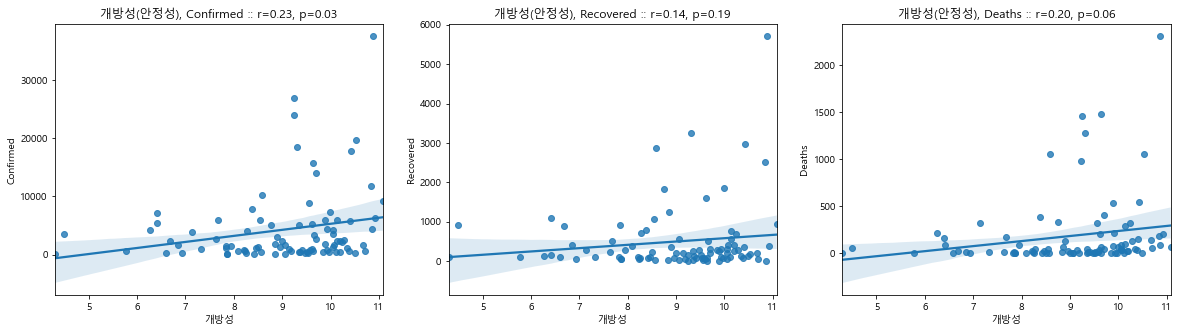

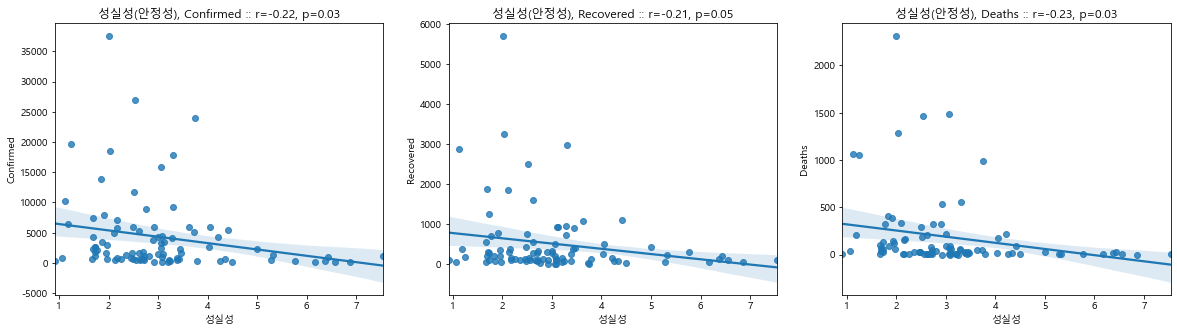

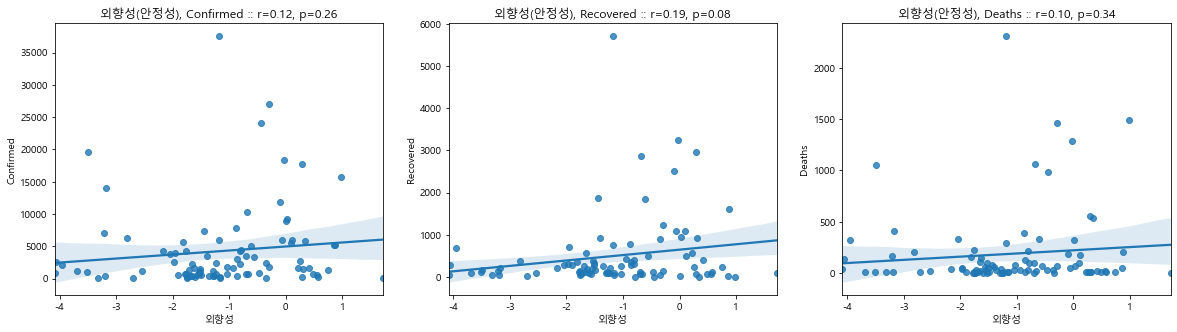

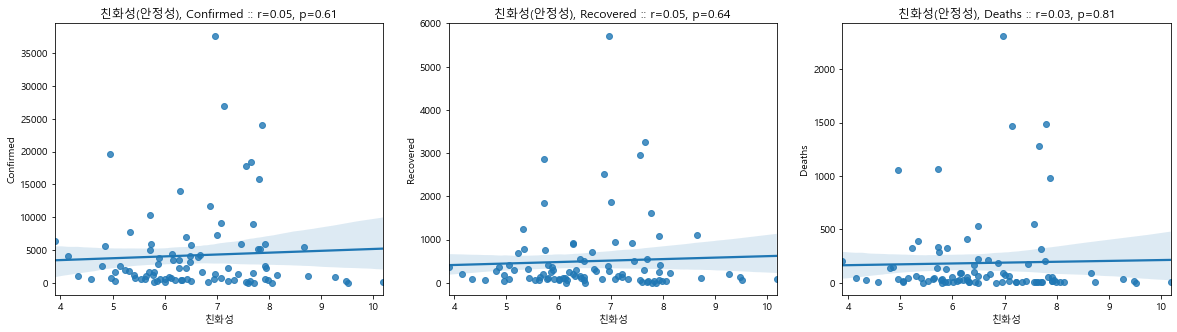

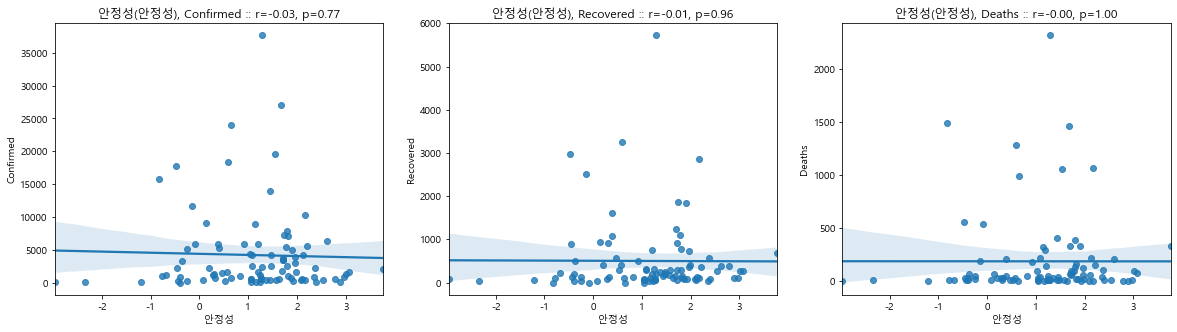

In [76]:
for triat, trait_kor in traits.items():
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))
    
    for i, n in enumerate(['Confirmed', 'Recovered', 'Deaths']):
        # 선형성, p-value
        corr = pearsonr(new_df[trait_kor], new_df[n])
        
        sns.regplot(x=trait_kor, y=n, data=new_df, ax=axes[i])
        axes[i].set_title('%s(%s), %s :: r=%.2f, p=%.2f' % (trait_kor, trait, n, corr[0], corr[1]))

# 스피어만 상관계수

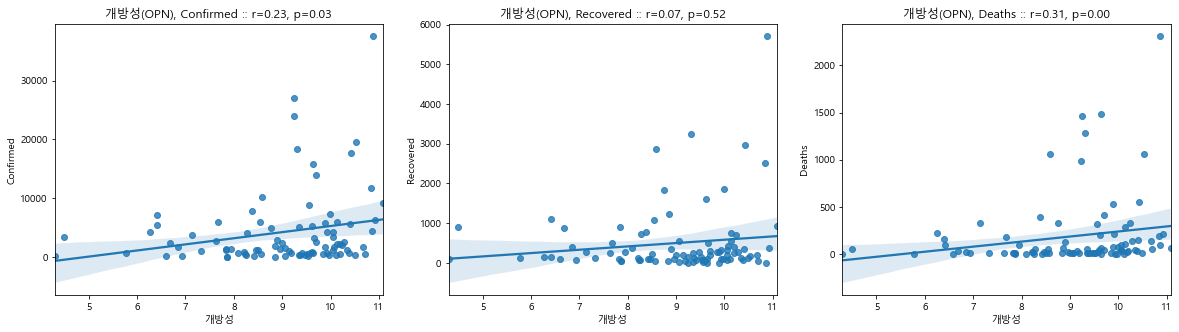

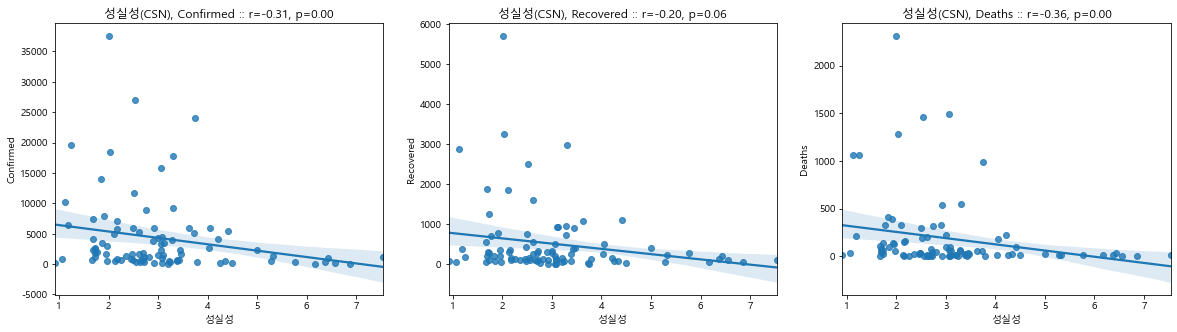

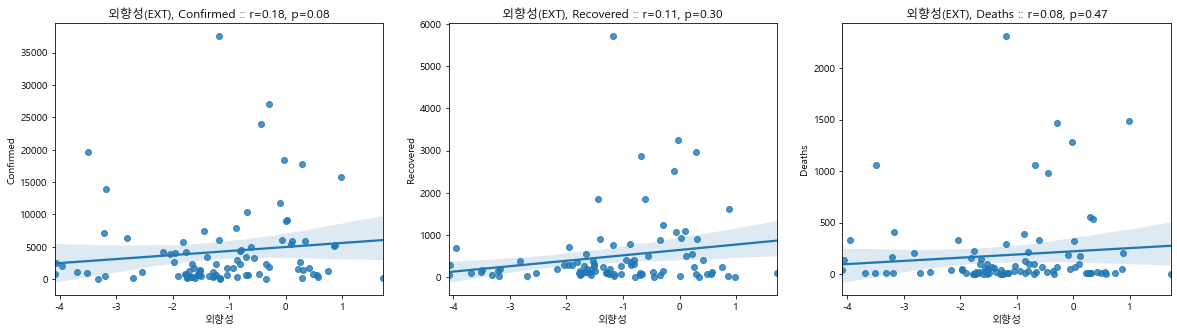

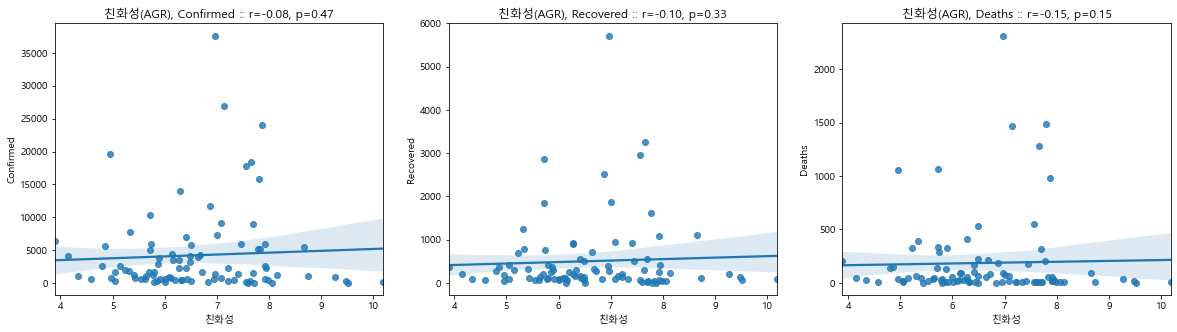

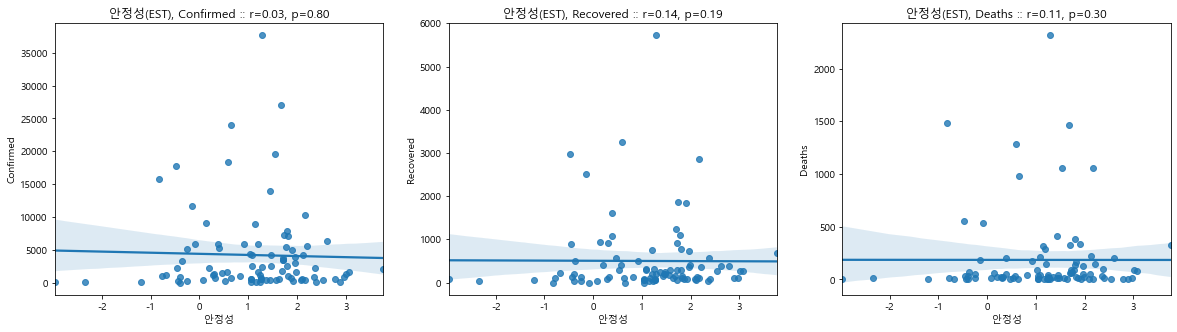

In [78]:
for trait, trait_kor in traits.items():
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))

    for i, n in enumerate(['Confirmed', 'Recovered', 'Deaths']):
        corr = spearmanr(
            new_df[trait_kor], 
            new_df[n]
        )

        sns.regplot(x=trait_kor, y=n, data=new_df, ax=axes[i])
        axes[i].set_title('%s(%s), %s :: r=%.2f, p=%.2f' % (trait_kor, trait, n, corr[0], corr[1]))

# 개방성과 확진자수

In [77]:
new_df.sort_values('개방성', ascending=False)

,Country/Region,Date,Confirmed,Recovered,Deaths,Name,Code,country,개방성,성실성,외향성,친화성,안정성
43,Israel,2020-04-06,9191,939.0,64,Israel,IL,IL,11.083536,3.291971,0.030819,7.085158,0.138686
73,Poland,2020-04-11,6356,375.0,208,Poland,PL,PL,10.927395,1.188124,-2.813872,3.890469,2.611776
31,France,2020-03-28,37603,5718.0,2314,France,FR,FR,10.871051,2.003880,-1.184740,6.968964,1.292444
78,Serbia,2020-04-14,4465,0.0,94,Serbia,RS,RS,10.856000,3.075429,-0.786286,6.137714,1.032571
4,Austria,2020-04-04,11781,2507.0,186,Austria,AT,AT,10.836251,2.518538,-0.100412,6.876931,-0.143666
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,Bangladesh,2020-04-29,7103,150.0,163,Bangladesh,BD,BD,6.404669,2.171206,-3.206226,6.404669,1.813230
72,Philippines,2020-04-10,4195,140.0,221,Philippines,PH,PH,6.259472,4.214388,-1.764388,6.492746,2.128897
61,Nepal,2020-05-25,682,112.0,4,Nepal,NP,NP,5.772917,2.260417,-0.697917,6.425000,1.637500
55,Malaysia,2020-04-04,3483,915.0,57,Malaysia,MY,MY,4.485457,3.113003,-1.398905,6.270903,1.720381
